In [26]:
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from China import China
from SEIR import Covid19


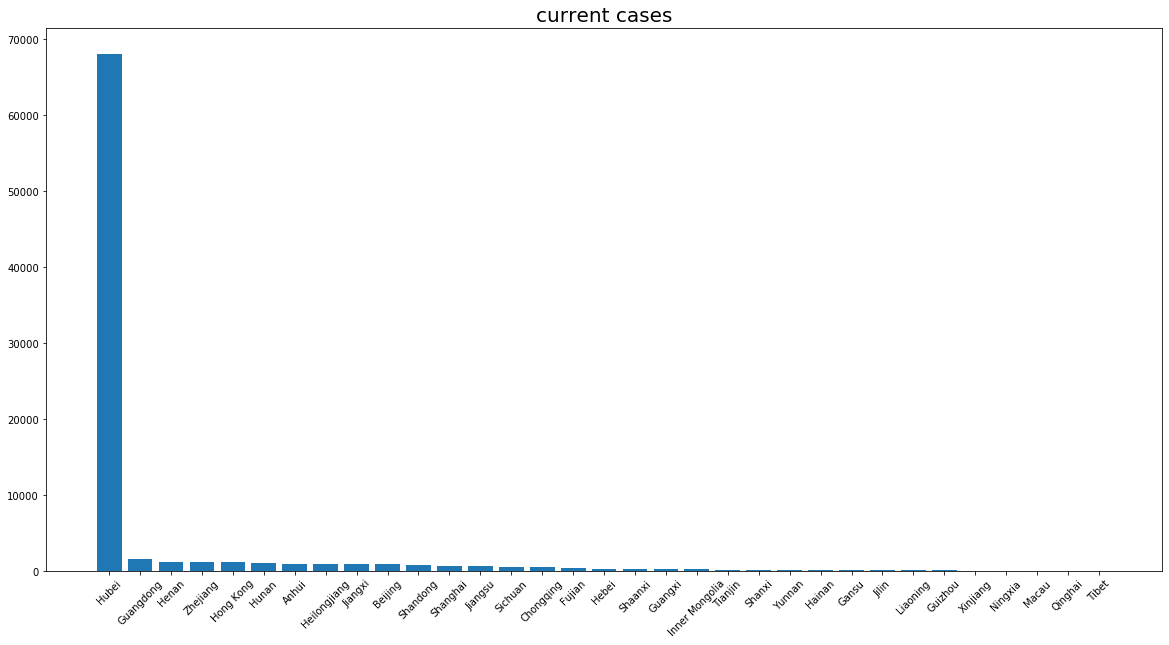

In [90]:
infections = pd.read_csv('cases.csv')
china_inf = infections[infections['Country/Region']=='China']
china_inf.drop(columns = ['Country/Region','Lat','Long'],inplace=True)

china_sorted = china_inf.sort_values(
    by = china_inf.columns[-1],
    ascending=False
)
prov_case = china_sorted.iloc[:,[0,159]]
names = prov_case.iloc[:,0].values
plt.figure(figsize=(20,10))
plt.bar(names,prov_case.iloc[:,1])
plt.xticks(rotation=45)
plt.title('current cases',fontsize=20);

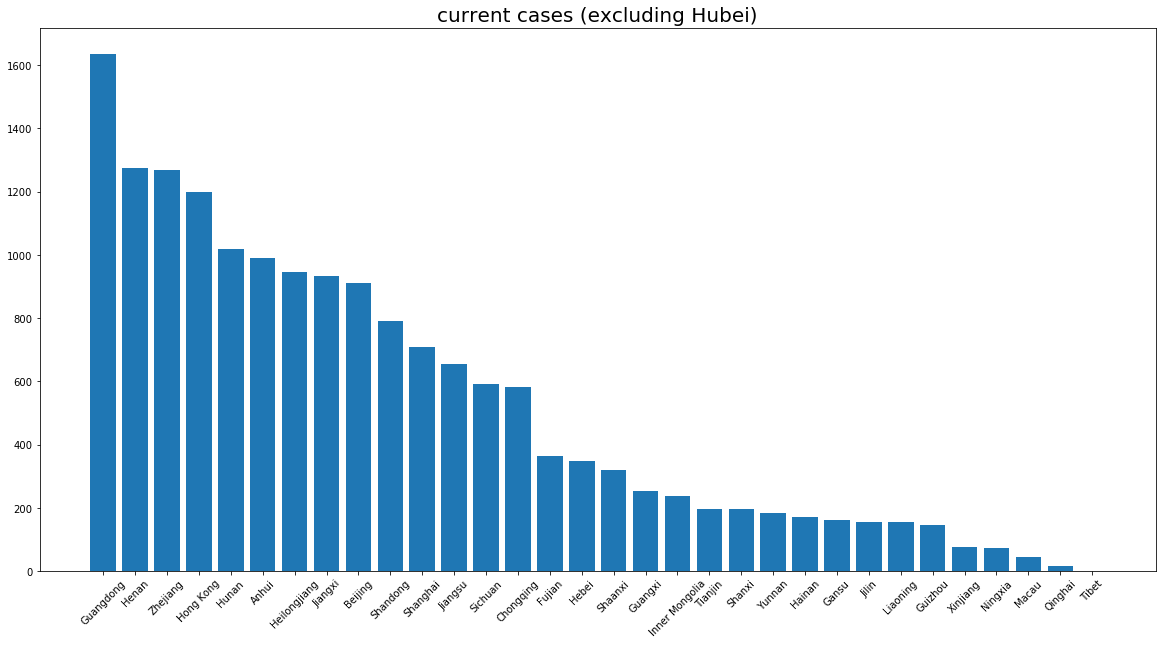

In [89]:
names = prov_case.iloc[1:,0].values
plt.figure(figsize=(20,10))
plt.bar(names,prov_case.iloc[1:,1])
plt.xticks(rotation=45)
plt.title('current cases (excluding Hubei)',fontsize=20);



In [1]:
china = China()
prov = china.get_provinces()
data = china.get_cases_removed('hubei')
virus = Covid19(data,[1,1,1])
res = virus.optimize()
inf = virus.get_curves(res)

#Printing RMSE for each evaluation. maxiter=200

c:\program files\python381\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


54944.46547341651
50618.617604705294
57627.28393297279
54909.610364509026
46663.27562463926
37873.70239595522
40411.653910657566
29088.70585920679
15902.150255157832
11178.614640229744
6249.94454407434
6949.060267691946
22877.493000497005
13008.527393381517
25674.160735325175
3490.9780284502895
8578.853078458083
3043.9897121631498
6984.7120650909455
4159.152940051787
7323.214561384131
3528.37448781537
5706.670333584054
2580.760243005034
5605.030546966628
2307.8545962146045
3555.1090680904113
2519.179742404363
3481.356279273219
2305.3187913053603
3286.25222018291
2182.167910952481
2682.8347107157724
2211.0647609706775
2584.150413216681
2151.2073856074458
2370.2055733425036
2164.126217404016
2277.95680151108
2141.0214649788963
2278.974540729003
2132.9787251917837
2209.0763902706863
2132.93972938633
2154.9009581118785
2132.7851504364635
2148.541219879115
2129.724012753865
2154.8472916411915
2127.1242089696875
2141.1853249948713
2128.3122770585223
2129.424796344063
2123.250674609316
2121.1

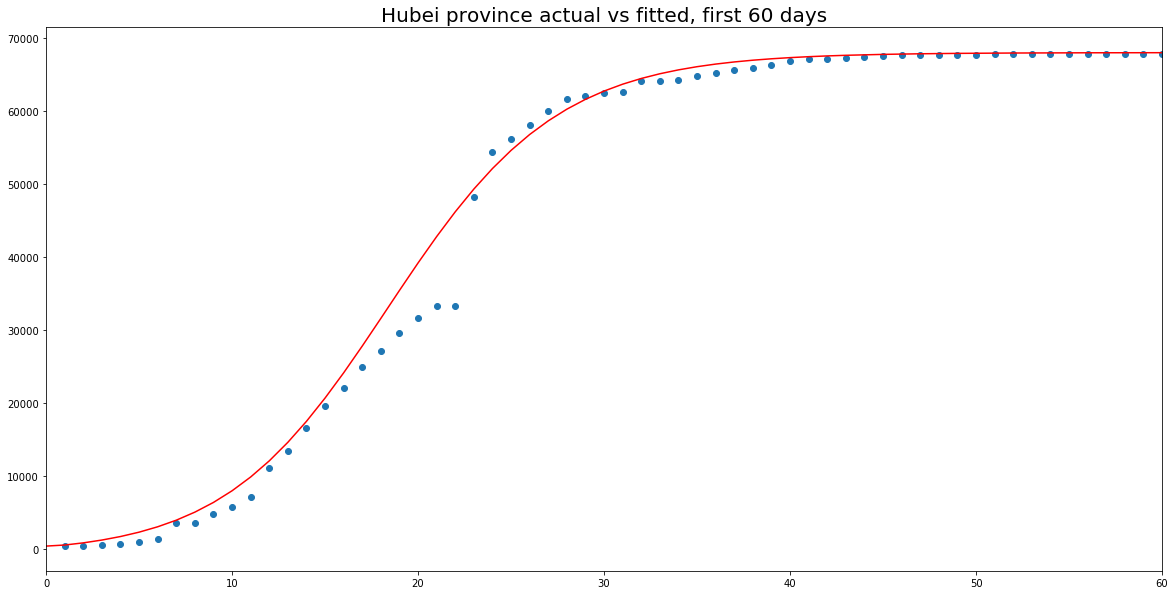

In [73]:
plt.figure(figsize = (20,10))
dates = np.linspace(1,inf.size,inf.size)

plt.scatter(dates,data.iloc[:,0])
plt.plot(inf,color='red')
plt.xlim((0,60))
plt.title('Hubei province actual vs fitted, first 60 days',fontsize=20);

In [74]:
def residual_plot(fit,actual,xmax):
    """
    Plot standardized residuals
    span 0 to xmax days
    """
    plt.figure(figsize=(20,5))
    days = np.linspace(1,fit.size,fit.size)
    resid = fit-actual
    resid_sd = resid/resid.std()
    plt.scatter(days,resid_sd,s=50)
    plt.hlines(np.mean(resid_sd),0,days.size,color='red')
    plt.xlim((0,xmax))
    plt.title('Standardized Residuals',fontsize=20)
    
    print('residual mean: {}'.format(np.mean(resid_sd)))
    
def act_vs_fitted(fit,actual):
    plt.scatter(actual,fit)

residual mean: 0.01200630893511274


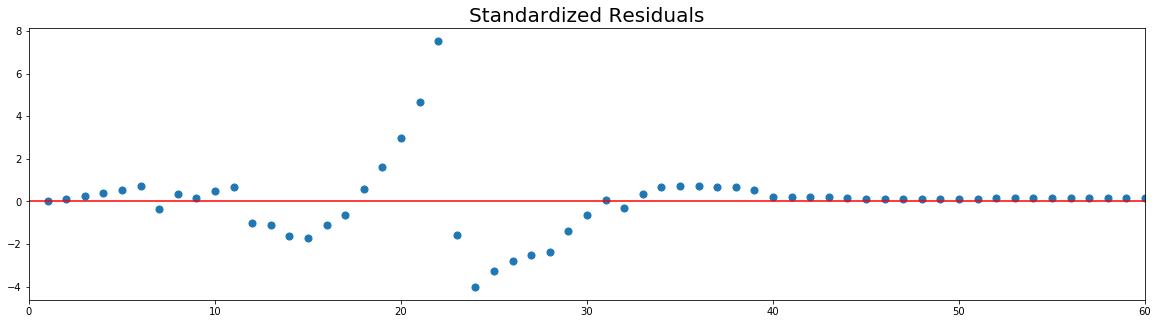

In [72]:
residual_plot(inf,data.iloc[:,0],60)